# Analyse Std Dev Markit France

In [128]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [129]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 07.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

c:\Users\rmolli\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

## France Base Load Analysis

### Analyse Quarters

In [131]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Markit Participants', '% NaN'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100,2)
      
recap_Fra_quarters.dropna(inplace = True, axis  ='columns' )
recap_Fra_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,
Min,0.78,2.94,1.13,1.28,0.88,11.27,5.79,5.33,1.03,2.64,1.54,1.93,0.39,8.07,2.25,3.58,4.29
Average,8.37,10.24,3.89,4.35,4.98,15.32,7.54,6.7,4.15,9.19,5.47,6.18,4.65,11.36,4.77,5.47,7.68
Max,17.67,20.15,8.17,8.77,10.52,22.18,9.73,8.27,9.27,16.37,11.93,12.31,12.69,20.14,6.45,6.75,11.42
Markit Participants,15.25,13.65,13.05,11.8,12.77,10.65,10.55,10.47,11.28,9.03,8.95,7.83,8.52,5.95,5.9,5.47,5.95
% NaN,75,75,75,75,75,75,75,75,75,75,75,75,75,90,90,92.5,88.33


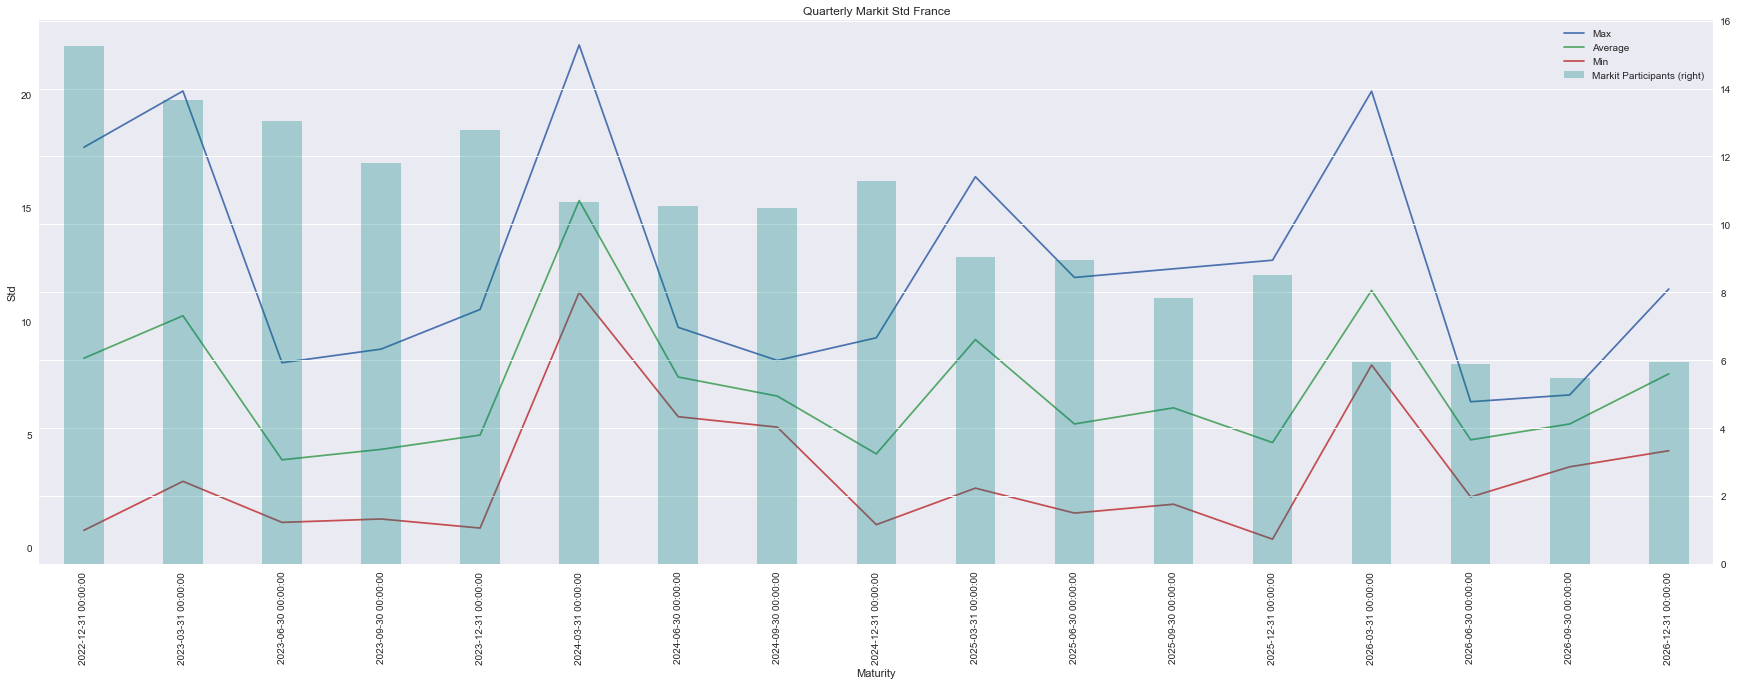

In [132]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France")

ax1=recap_Fra_quarters.loc['Max'].plot(legend = True)
ax1=recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xticklabels(recap_Fra_quarters.columns, rotation = 90 )
ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Fra_quarters.loc['Markit Participants'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)
#ax1.set_xticklabels( rotation=45 ) ;

In [133]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

3.24
12.52
7.08


In [134]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [135]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

1.4
13.06
6.37


In [136]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

4.01
12.29
7.37


### Analyse Months

In [137]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Month') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices', "% NaN"])
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
      recap_Fra_months.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
      
recap_Fra_months.dropna(inplace = True, axis='columns')
recap_Fra_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,...,2026-03-31 00:00:00,2026-04-30 00:00:00,2026-05-31 00:00:00,2026-06-30 00:00:00,2026-07-31 00:00:00,2026-08-31 00:00:00,2026-09-30 00:00:00,2026-10-31 00:00:00,2026-11-30 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,0.52,1.32,2.52,8.19,0.78,12.96,11.34,2.94,3.66,3.11,...,8.07,3.54,3.18,2.25,1.78,4.1,3.58,5.05,5.97,4.29
Average,2.24,3.19,7.75,14.4,8.37,15.78,14.5,10.24,7.97,5.98,...,11.36,4.42,4.84,4.77,2.58,4.1,5.47,5.05,5.97,7.68
Max,5.96,6.7,14.76,18.91,17.67,19.83,19.88,20.15,12.88,8.61,...,20.14,5.29,6.49,6.45,3.38,4.1,6.75,5.05,5.97,11.42
Nb of Prices,13.75,15.68,13.9,13.85,15.25,13.05,12.9,13.65,12.75,12.75,...,5.95,5.7,5.7,5.9,5.65,5.25,5.47,5.25,5.2,5.95
% NaN,75,75,75,75,75,75,75,75,75,75,...,90,90,90,90,90,95,92.5,95,95,88.33


In [138]:
data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== '2023-05-31 00:00:00') ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== '2023-05-31 00:00:00') ,"ns1:StandardDeviationPrice"].shape[0]

0.75

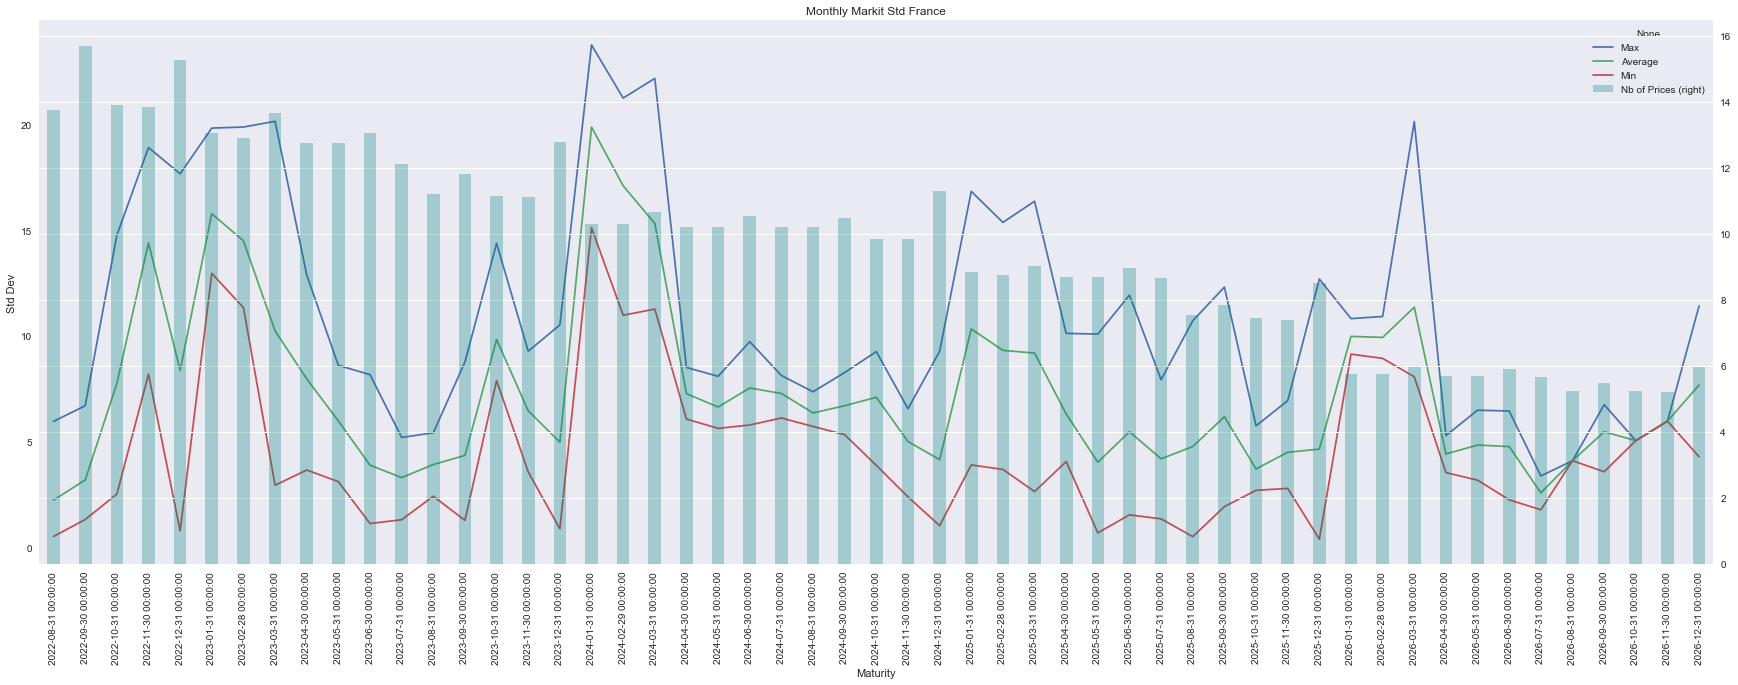

In [139]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")
ax1.legend(['Max', 'Average','Min'])

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar', secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [140]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

4.36
11.01
7.29


In [141]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [142]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

2.67
12.8
7.19


In [143]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

4.54
10.82
7.3


### Analyse Years

In [144]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Year') ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices', '% NaN'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
      recap_Fra_years.iloc[4,j] = round((data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].isna().sum() / data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,"ns1:StandardDeviationPrice"].shape[0])*100, 2)
 
recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,0.88,1.03,0.39,4.29
Average,4.98,4.15,4.65,7.68
Max,10.52,9.27,12.69,11.42
Nb of Prices,12.77,11.28,8.52,5.95
% NaN,75,75,75,88.33


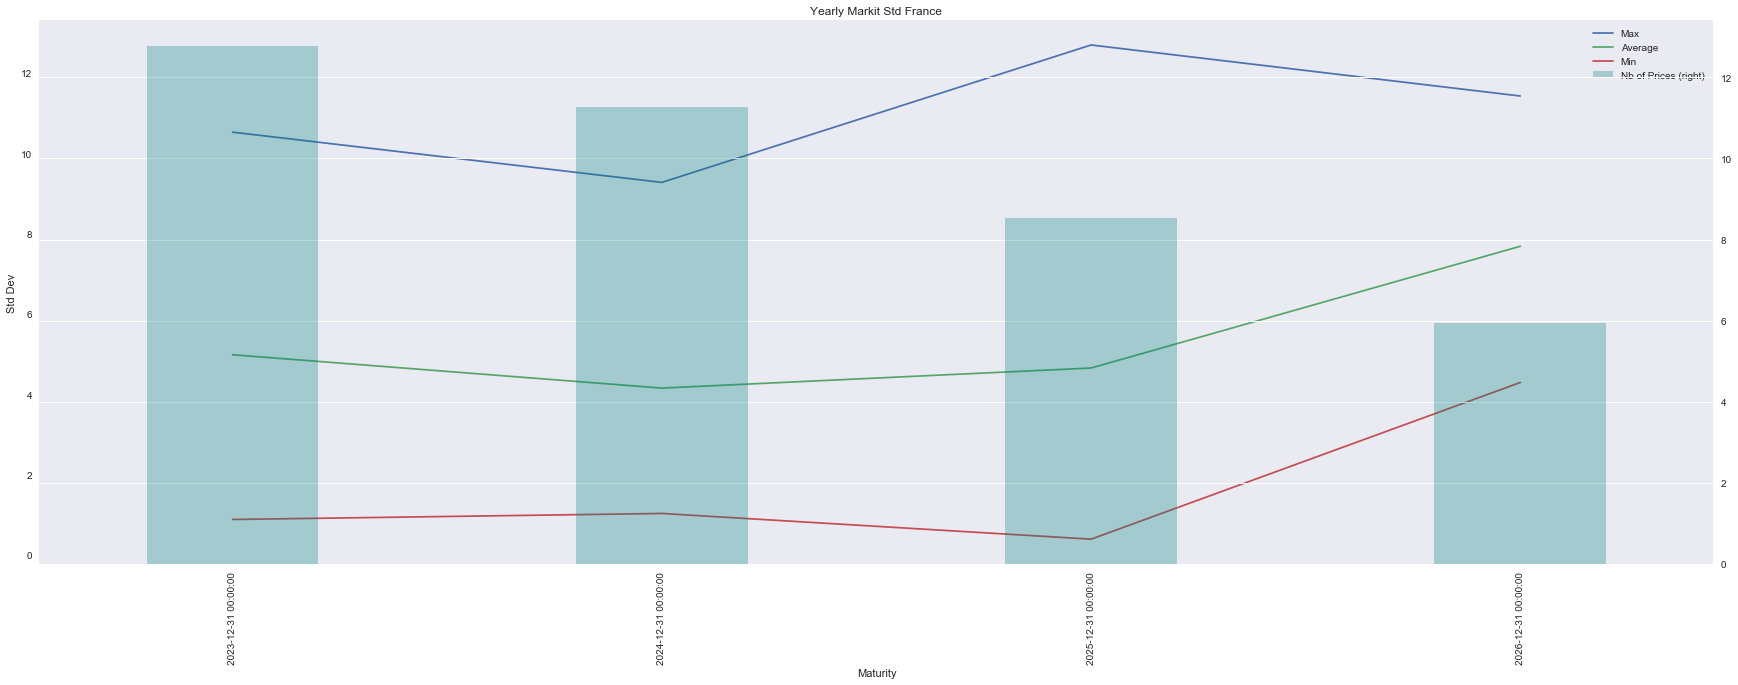

In [145]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [146]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

1.65
10.98
5.36


In [147]:
quarters_ST = recap_Fra_years.columns[0] 
quarters_LT = recap_Fra_years.columns[0:] 

In [148]:
print(round(recap_Fra_years.loc["Min", quarters_ST],2))
print(round(recap_Fra_years.loc["Max", quarters_ST],2))
print(round(recap_Fra_years.loc["Average", quarters_ST],2))

0.88
10.52
4.98


In [149]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

1.65
10.98
5.36


## France Peaks Analysis

### Analyse Quarters

In [150]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Fra_quarters.dropna(inplace = True, axis='columns' )
recap_Fra_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,
Min,11.94,12.72,6.64,12.81,4.38,27.51,15.16,18.27,4.35,10.77,5.66,8.11,1.35,10.28,6.99,8.5,6.21,16.77,10.41
Average,36.46,36.77,14.56,21.44,23.49,49.87,23.67,28,14.67,23.94,13.08,15.41,9.74,17.97,9.01,8.5,12.56,16.77,10.41
Max,84.12,67.27,30.99,35.56,48.74,87.5,35.39,38.55,28.92,40.89,19.15,20.84,32.85,26.4,10.31,8.5,16.39,16.77,10.41
Nb of Prices,13.65,11.35,11.12,10.97,11.9,10.65,10.6,10.43,11.02,8.78,8.7,7.17,8.03,5.8,5.67,4.3,4.67,4.19,4.24


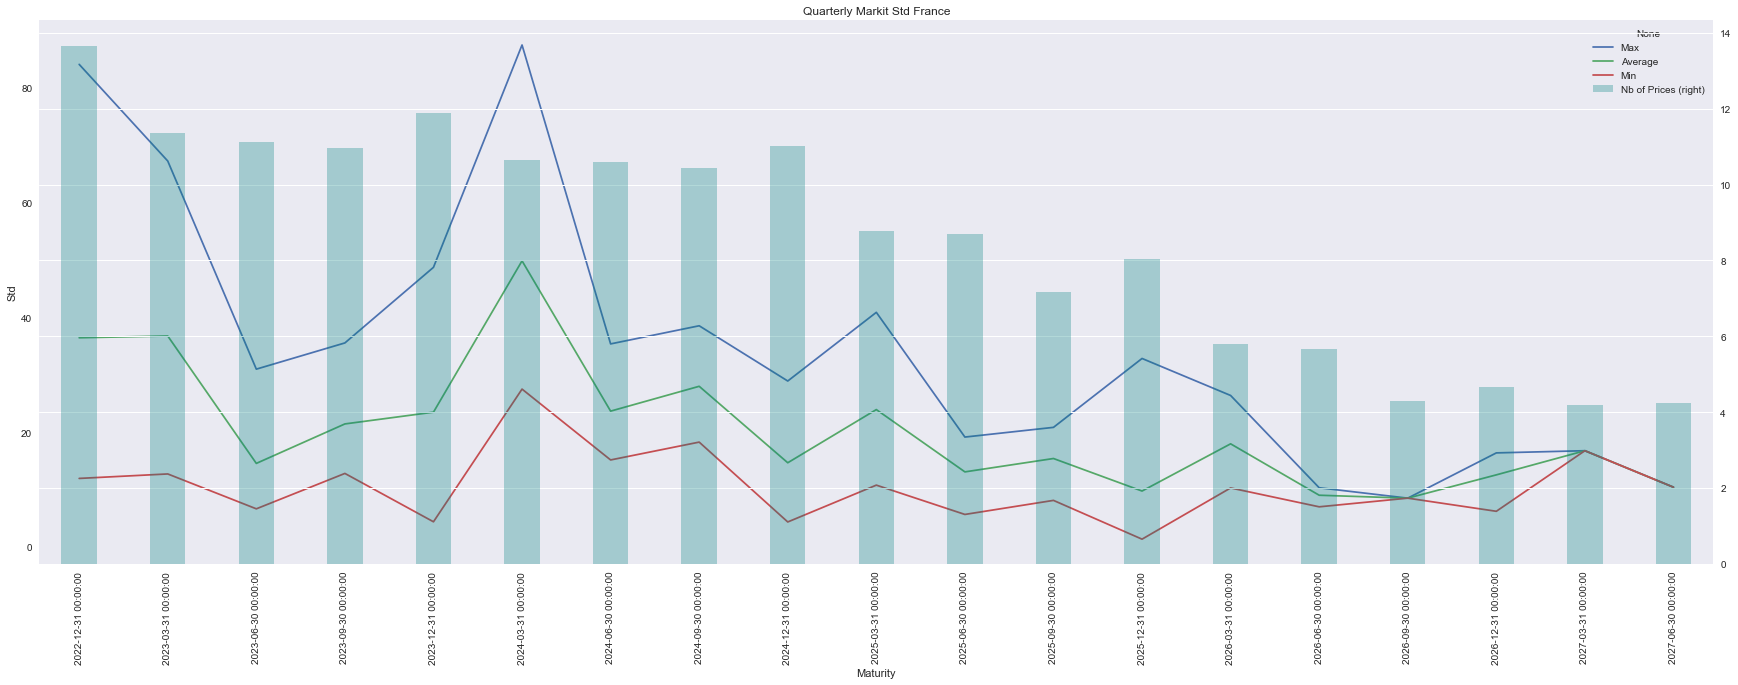

In [151]:
plt.figure(figsize=(30, 10))
plt.title("Quarterly Markit Std France")

recap_Fra_quarters.loc['Max'].plot(legend = True)
recap_Fra_quarters.loc['Average'].plot(legend = True)
ax1= recap_Fra_quarters.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")
ax1.legend(['Max', 'Average','Min'])

ax2 = recap_Fra_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True)

In [152]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

10.46
34.71
20.33


In [153]:
quarters_ST = recap_Fra_quarters.columns[:5] 
quarters_LT = recap_Fra_quarters.columns[5:] 

In [154]:
print(round(recap_Fra_quarters.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_ST].mean(),2))

9.7
53.34
26.54


In [155]:
print(round(recap_Fra_quarters.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_quarters.loc["Average", quarters_LT].mean(),2))

10.74
28.06
18.11


### Analyse Months

In [119]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_months.dropna(inplace = True, axis='columns' )
recap_Fra_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,...,2026-02-28 00:00:00,2026-03-31 00:00:00,2026-04-30 00:00:00,2026-05-31 00:00:00,2026-06-30 00:00:00,2026-07-31 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,6.08,8.21,30.12,47.92,11.94,36.09,24.4,12.72,11.23,14.24,...,15.75,10.28,3.11,7.54,6.99,6.01,8.5,6.21,16.77,10.41
Average,11.17,12.72,40,73.11,36.46,52.42,45.73,36.77,16.25,18.75,...,17.18,17.97,6.53,8.23,9.01,6.83,8.5,12.56,16.77,10.41
Max,16.94,22.9,51.4,105.68,84.12,74.08,68.61,67.27,27.03,26.13,...,19,26.4,8.69,9.48,10.31,7.65,8.5,16.39,16.77,10.41
Nb of Prices,11.65,14.12,12.5,12.3,13.65,11.1,11.05,11.35,10.45,10.4,...,5.35,5.8,5.25,5.25,5.67,5.15,4.3,4.67,4.19,4.24


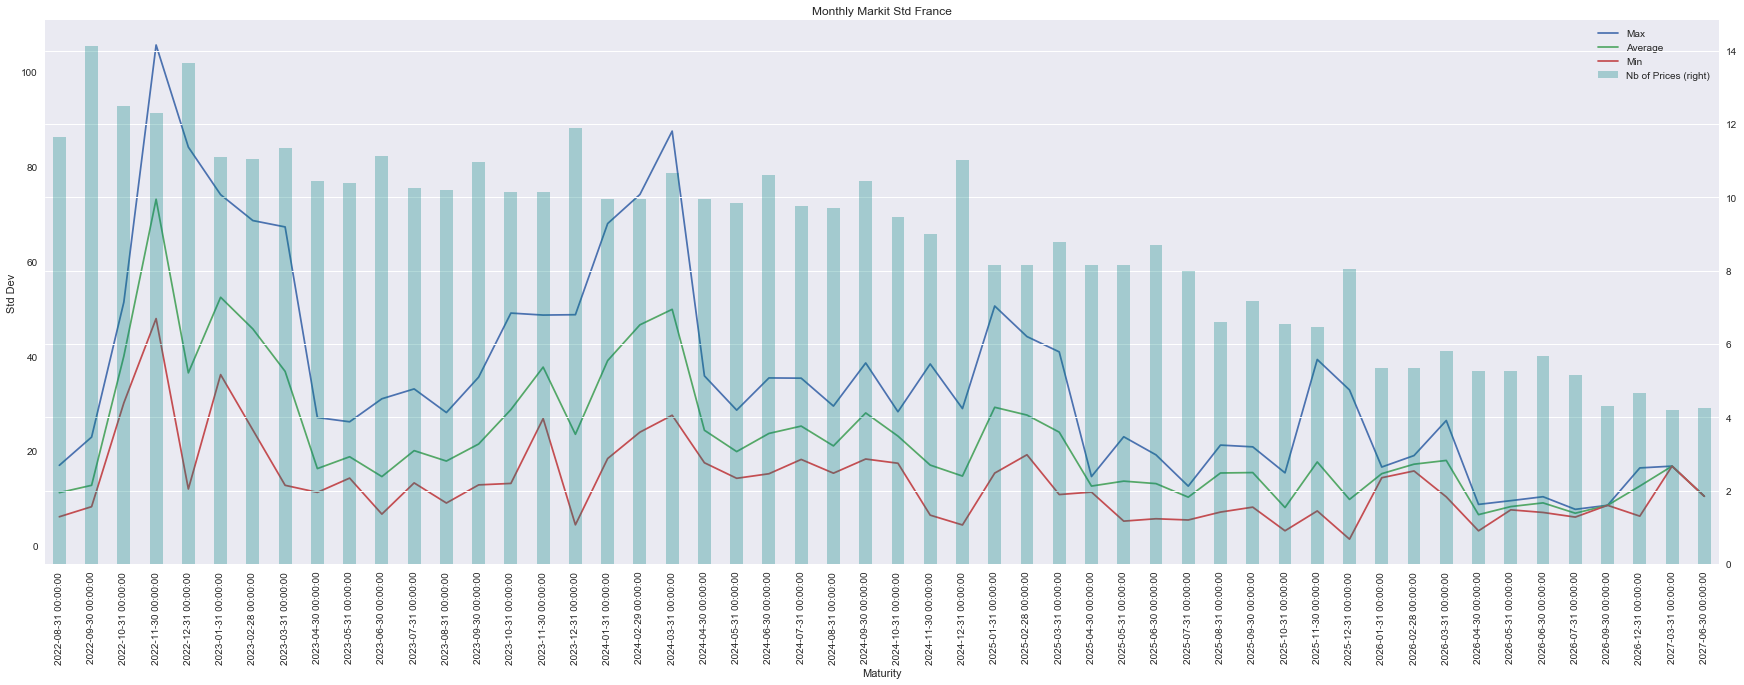

In [120]:
plt.figure(figsize=(30, 10))
plt.title("Monthly Markit Std France")

recap_Fra_months.loc['Max'].plot(legend = True)
recap_Fra_months.loc['Average'].plot(legend = True)
ax1= recap_Fra_months.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True);

In [121]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

13.29
35.21
22.4


In [122]:
quarters_ST = recap_Fra_months.columns[:5] 
quarters_LT = recap_Fra_months.columns[5:] 

In [123]:
print(round(recap_Fra_months.loc["Min", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_ST].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_ST].mean(),2))

20.85
56.21
34.69


In [124]:
print(round(recap_Fra_months.loc["Min", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Max", quarters_LT].mean(),2))
print(round(recap_Fra_months.loc["Average", quarters_LT].mean(),2))

12.48
32.98
21.1


### Analyse Years

In [125]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,4.38,4.35,1.35,6.21
Average,23.49,14.67,9.74,12.56
Max,48.74,28.92,32.85,16.39
Nb of Prices,11.9,11.02,8.03,4.67


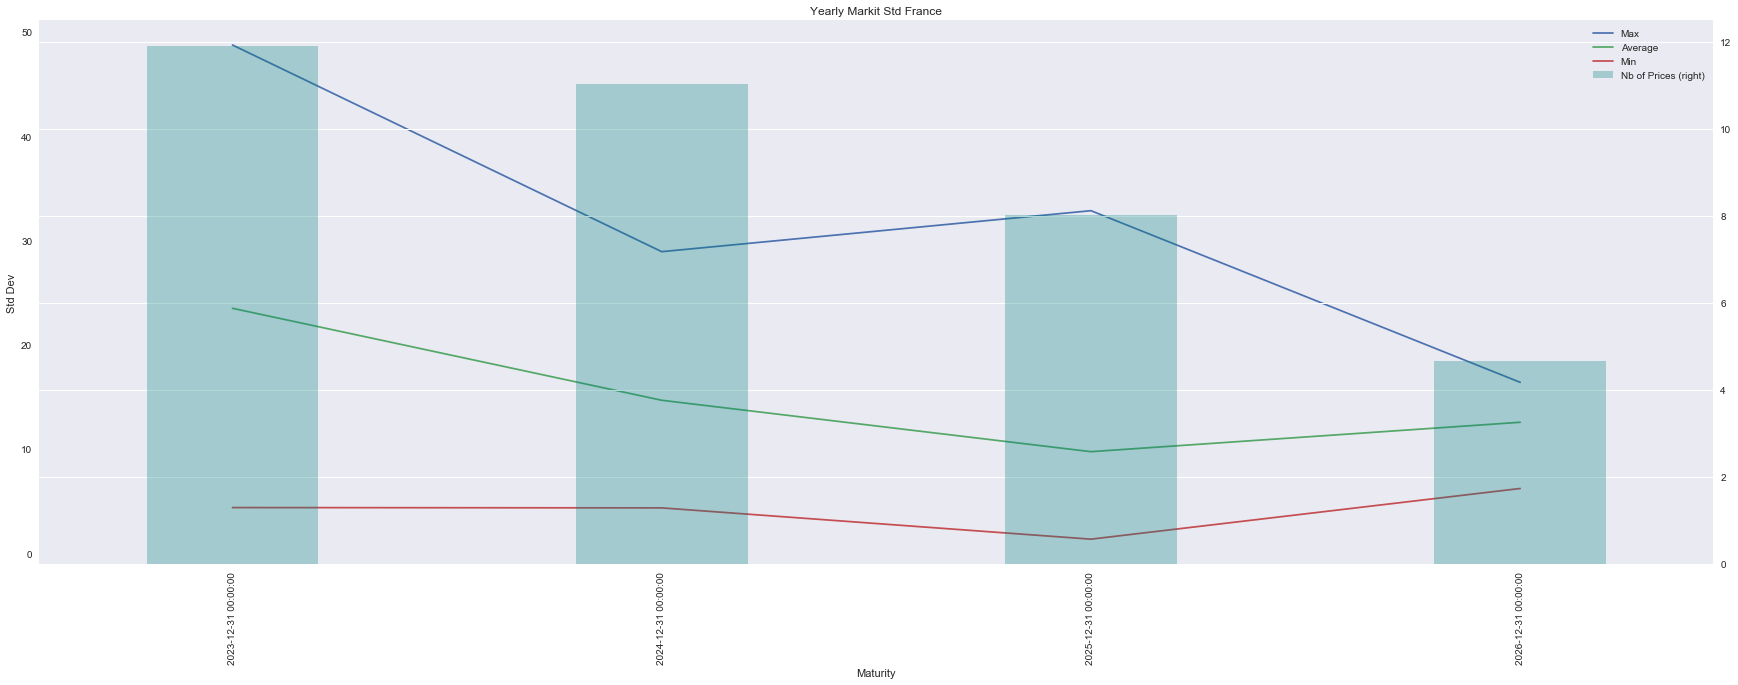

In [126]:
plt.figure(figsize=(30, 10))
plt.title("Yearly Markit Std France")

recap_Fra_years.loc['Max'].plot(legend = True)
recap_Fra_years.loc['Average'].plot(legend = True)
ax1= recap_Fra_years.loc['Min'].plot(legend = True)

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3, legend = True );

In [127]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

4.07
31.72
15.12
